In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib

In [13]:
# Load data
df = pd.read_csv('train.csv').drop('id', axis=1)
df_test = pd.read_csv('test.csv').drop('id', axis=1)
df_extra = pd.read_csv('training_extra.csv').drop('id', axis=1)
df_full = pd.concat([df, df_extra], axis=0)
df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [14]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 22.9+ MB


,count,mean,std,min,25%,50%,75%,max
Compartments,300000.0,5.443590,2.890766,1.0,3.000000,5.000000,8.000000,10.0
Weight Capacity (kg),299862.0,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0
Price,300000.0,81.411107,39.039340,15.0,47.384620,80.956120,115.018160,150.0


In [15]:
# Check for missing values
df.isnull().sum()

Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [16]:
# columns
cat_cols = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof','Style', 'Color']
num_cols = ['Weight Capacity (kg)', 'Price']
cat_cols, num_cols

(['Brand',
  'Material',
  'Size',
  'Compartments',
  'Laptop Compartment',
  'Waterproof',
  'Style',
  'Color'],
 ['Weight Capacity (kg)', 'Price'])

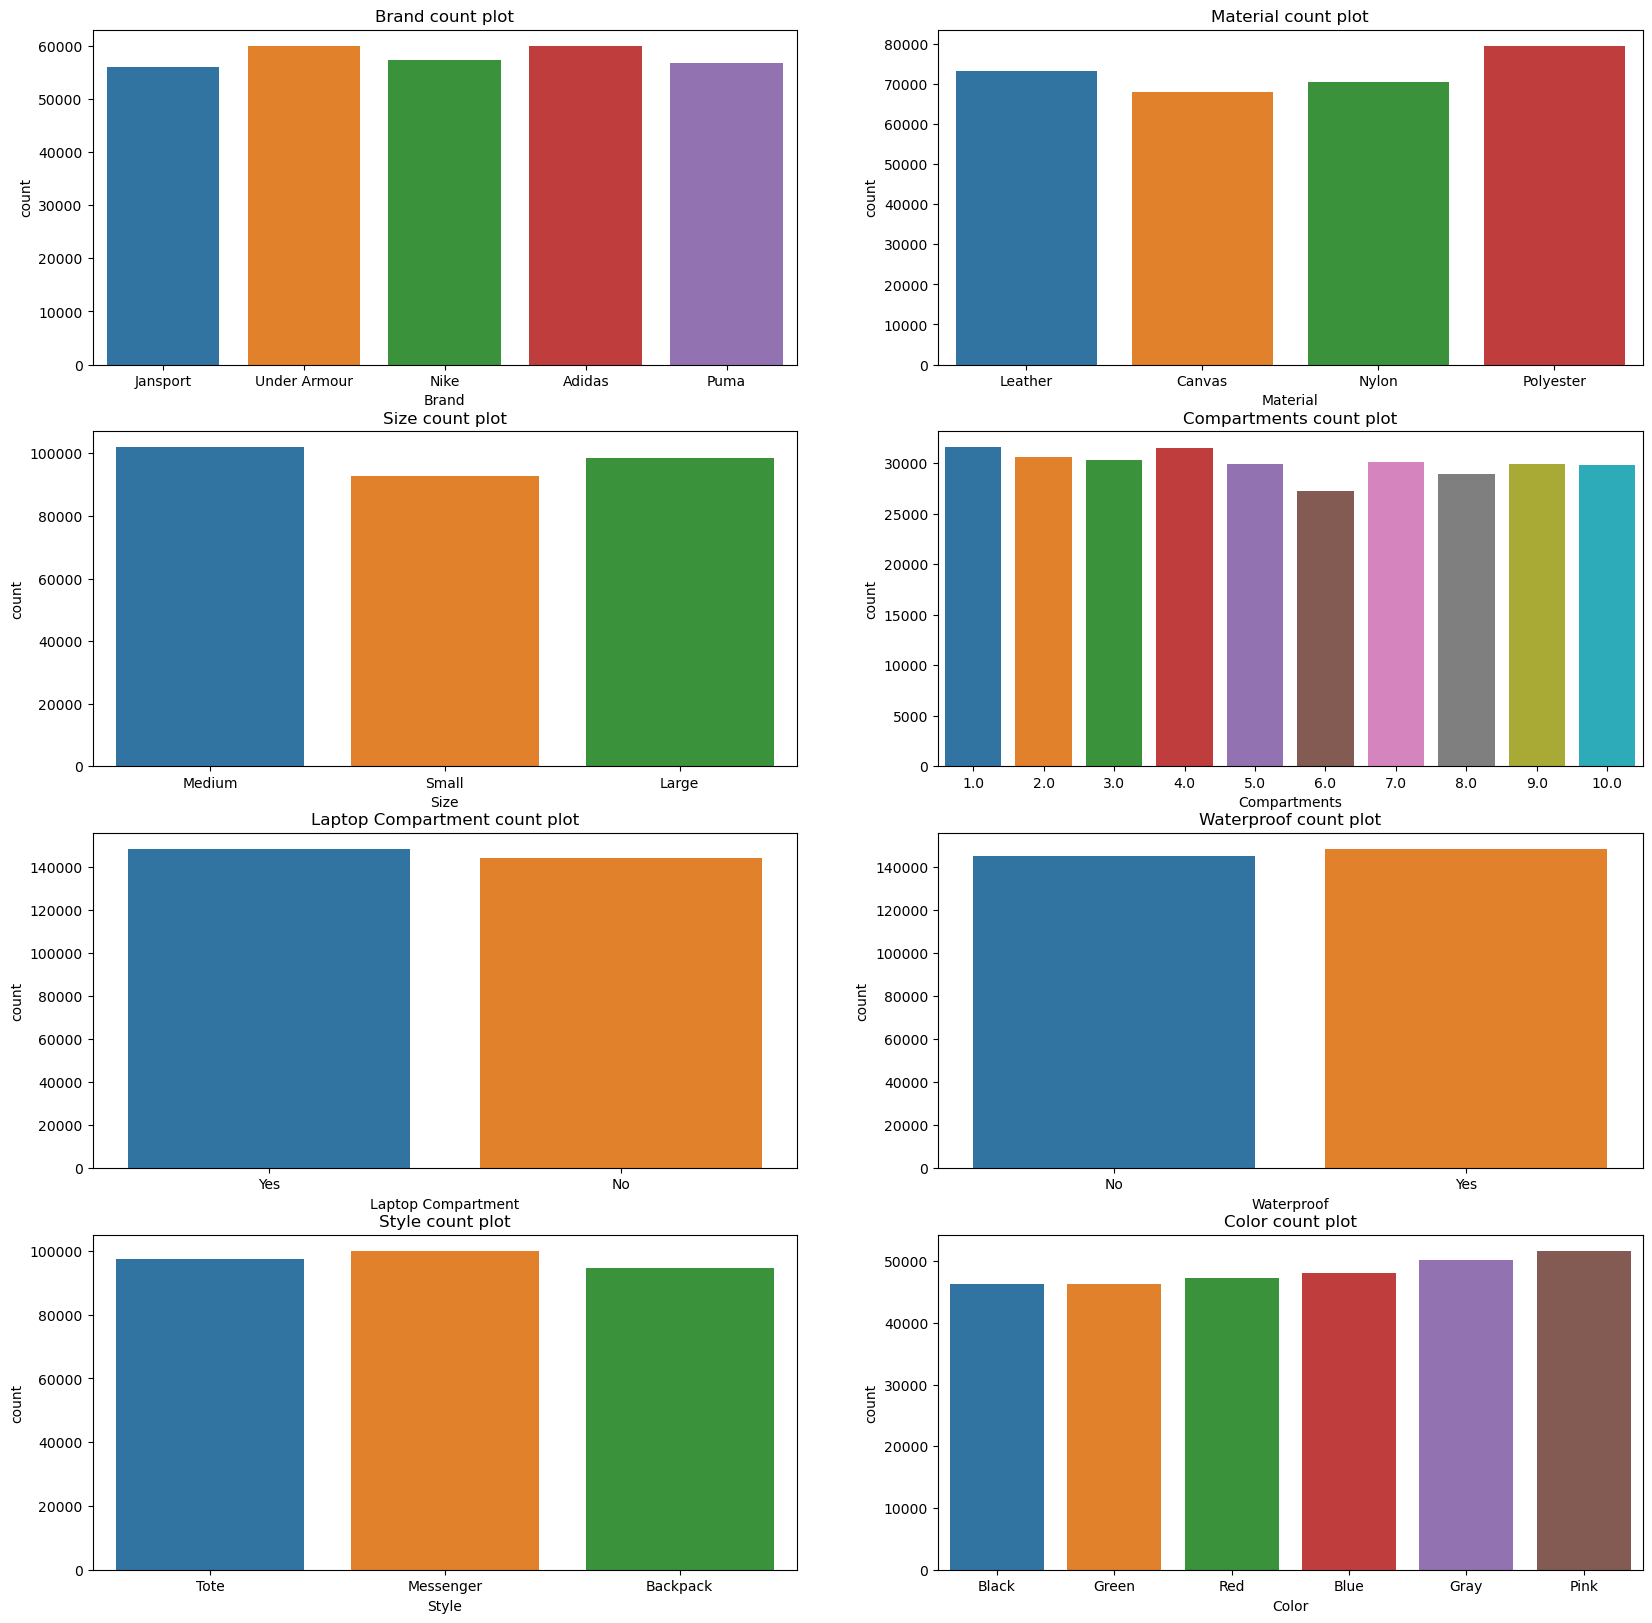

In [17]:
# drow cat cols
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} count plot')

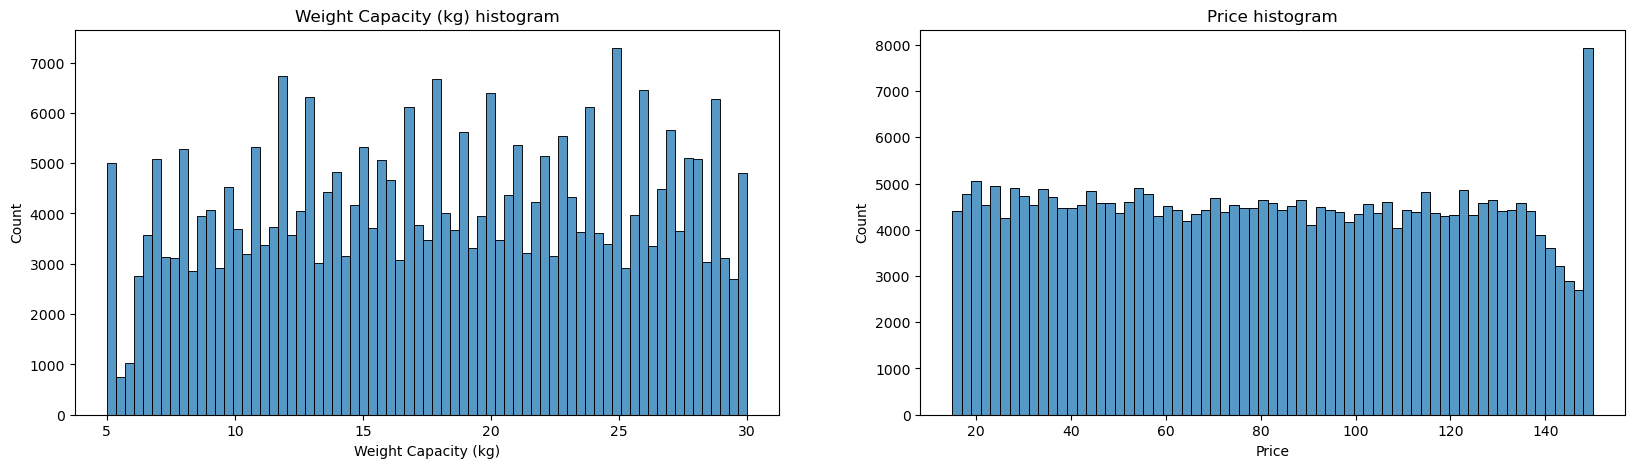

In [18]:
# draw num cols
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(f'{col} histogram')

C:\Users\gemy2\AppData\Local\Temp\ipykernel_7380\419219445.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


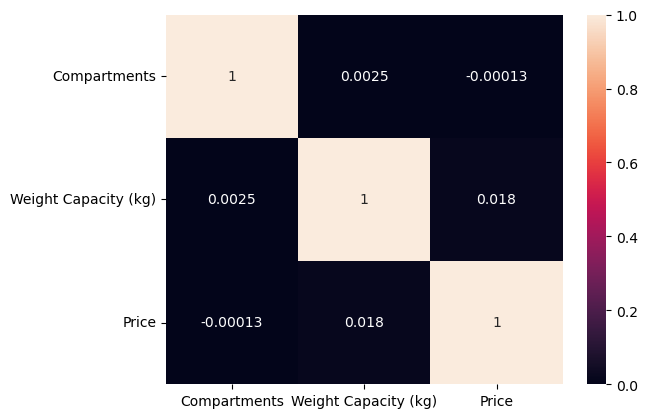

In [19]:
# correlation
sns.heatmap(df.corr(), annot=True)
plt.show()

In [20]:
# split data
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
cat_cols = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof','Style', 'Color']
num_cols = ['Weight Capacity (kg)']

# cat pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# num pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# full pipeline
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
])

preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Brand', 'Material', 'Size', 'Compartments',
                                  'Laptop Compartment', 'Waterproof', 'Style',
                                  'Color']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Weight Capacity (kg)'])])

In [23]:
# List of models to try
models = [
    ('Linear Regression', LinearRegression()),
    #('Random Forest', RandomForestRegressor(random_state=42)),
    #('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# Loop through models
for name, model in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    score = pipeline.score(X_test, y_test)
    
    # Print results
    print(f"{name} MSE: {mse}, Score: {score}")

Linear Regression MSE: 1518.3462088176445, Score: 0.0011161815037296074
Gradient Boosting MSE: 1518.3153657747378, Score: 0.0011364724072757681


In [24]:
#Best mode;
model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(random_state=42))
    ])

# train the model on full data
model.fit(df_full.drop('Price', axis=1), df_full['Price'])

y_pred = model.predict(df_test)
y_pred

array([81.87815332, 82.48750448, 81.88775507, ..., 82.59673911,
       81.87505419, 81.50701537])

In [25]:
sample_submission = pd.read_csv('sample_submission.csv') # load sample submission
sample_submission['Price'] = y_pred # update sample submission
sample_submission.head()

,id,Price
0,300000,81.878153
1,300001,82.487504
2,300002,81.887755
3,300003,81.427441
4,300004,81.063467


In [26]:
# save submission
sample_submission.to_csv('submission.csv', index=False)

In [27]:
joblib.dump(model, 'model.pkl') # save model

['model.pkl']

In [28]:
#model = joblib.load('model.pkl') # load model